In [1]:
# allows for local scripts to be modified and run without reloading the kernel
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../")

import seaborn as sns
import matplotlib.pyplot as plt
import pylidc as pl
import configparser

if not hasattr(configparser, "SafeConfigParser"):
    configparser.SafeConfigParser = configparser.ConfigParser
import numpy as np

if not hasattr(np, "int"):
    np.int = int

from scripts.data_exploration import (
    extract_patient_data,
    show_random_image,
    DatasetStats,
)

/home/nkoranda/Projects/capstone/.venv/lib/python3.13/site-packages/pylidc/__init__.py:27: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as _pr


#### Show a random image from dataset

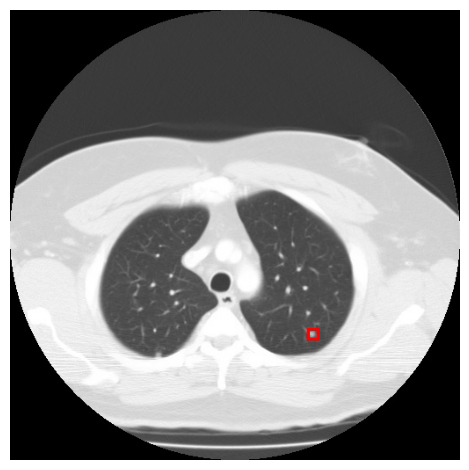

In [3]:
show_random_image(root_dir="../data/yolo", split="train")

#### Set theme for figures

In [4]:
sns.set_theme(style="whitegrid", context="talk", palette="Set2")

#### Initialize DatasetStats object to view analysis

In [5]:
stats = DatasetStats("../data/yolo")

#### bbox stats

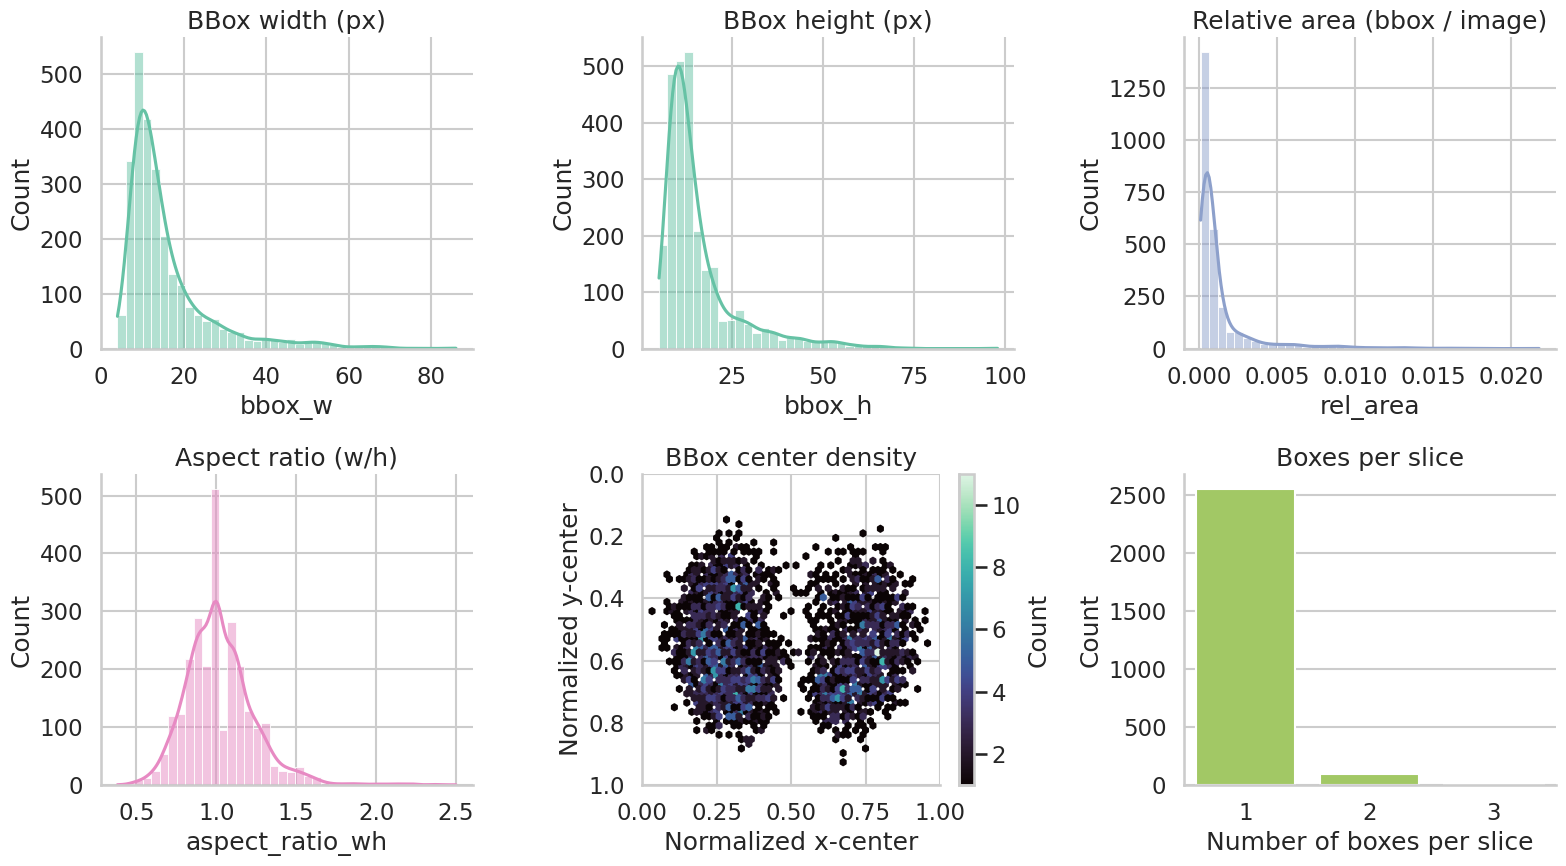

In [6]:
df = stats.get_bbox_stats()
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
axs = axs.ravel()

# 1) BBox width
sns.histplot(df, x="bbox_w", bins=40, kde=True, ax=axs[0])
axs[0].set_title("BBox width (px)")

# 2) BBox height
sns.histplot(df, x="bbox_h", bins=40, kde=True, ax=axs[1])
axs[1].set_title("BBox height (px)")

# 3) Relative area
sns.histplot(df, x="rel_area", bins=40, kde=True, ax=axs[2], color="C2")
axs[2].set_title("Relative area (bbox / image)")

# 4) Aspect ratio
sns.histplot(df, x="aspect_ratio_wh", bins=40, kde=True, ax=axs[3], color="C3")
axs[3].set_title("Aspect ratio (w/h)")

# 5) Center heatmap
hb = axs[4].hexbin(
    df["nx_center"],
    df["ny_center"],
    gridsize=60,
    extent=(0, 1, 0, 1),
    mincnt=1,
    cmap="mako",
)
axs[4].set_xlim(0, 1)
axs[4].set_ylim(1, 0)
axs[4].set_xlabel("Normalized x-center")
axs[4].set_ylabel("Normalized y-center")
axs[4].set_title("BBox center density")
cbar = fig.colorbar(hb, ax=axs[4])
cbar.set_label("Count")

# 6) Boxes per slice
sns.countplot(df, x="boxes_per_slice", ax=axs[5], color="C4")
axs[5].set_title("Boxes per slice")
axs[5].set_xlabel("Number of boxes per slice")
axs[5].set_ylabel("Count")

plt.tight_layout()
sns.despine()
plt.show()

#### patient data stats

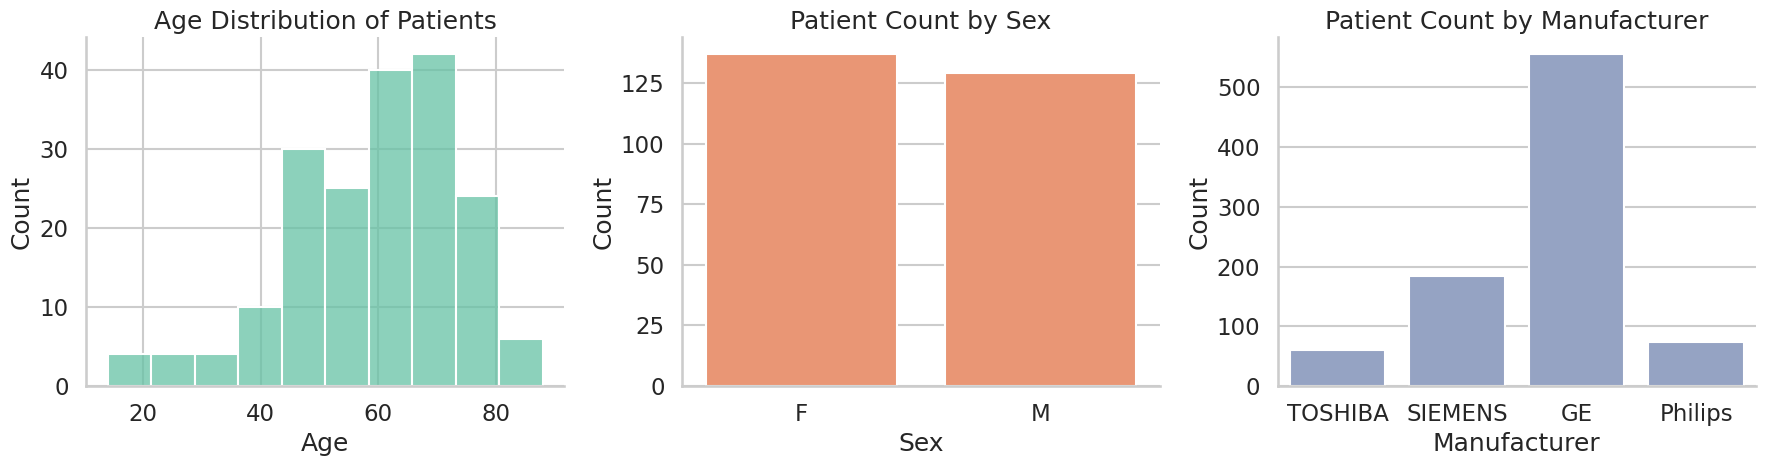

In [7]:
data = pl.query(pl.Annotation).all()
df = extract_patient_data(data)
df["manufacturer"] = df["manufacturer"].map(
    lambda x: "GE" if x == "GE MEDICAL SYSTEMS" else x
)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs = axs.ravel()

# age
sns.histplot(df, x="age", bins=10, kde=False, ax=axs[0], color=sns.color_palette()[0])
axs[0].set_title("Age Distribution of Patients")
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Count")

# sex
sns.countplot(df, x="sex", ax=axs[1], color=sns.color_palette()[1])
axs[1].set_title("Patient Count by Sex")
axs[1].set_xlabel("Sex")
axs[1].set_ylabel("Count")

# manufacturer
sns.countplot(df, x="manufacturer", ax=axs[2], color=sns.color_palette()[2])
axs[2].set_title("Patient Count by Manufacturer")
axs[2].set_xlabel("Manufacturer")
axs[2].set_ylabel("Count")

plt.tight_layout()
sns.despine()
plt.show()

#### image metric stats

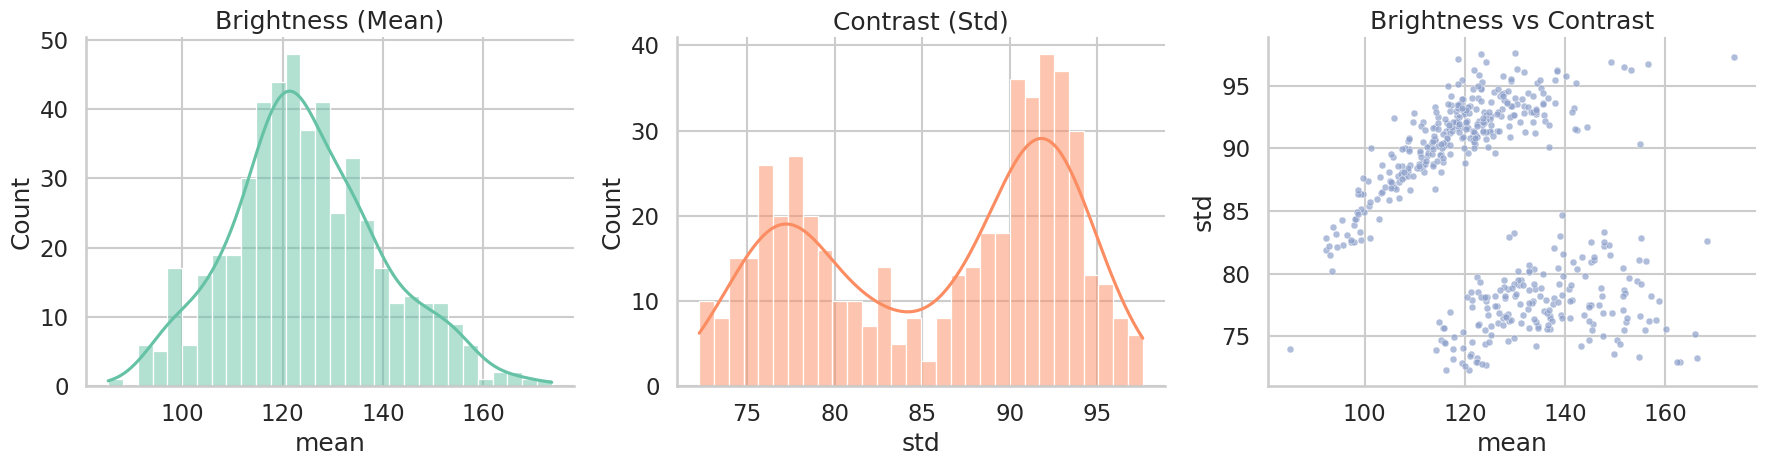

In [8]:
df = stats.get_brightness_contrast(sample=500)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs = axs.ravel()

# brightness
sns.histplot(df, x="mean", bins=30, kde=True, ax=axs[0], color=sns.color_palette()[0])
axs[0].set_title("Brightness (Mean)")

# contract
sns.histplot(df, x="std", bins=30, kde=True, ax=axs[1], color=sns.color_palette()[1])
axs[1].set_title("Contrast (Std)")

# brightness vs contrast
sns.scatterplot(
    df, x="mean", y="std", s=25, alpha=0.7, ax=axs[2], color=sns.color_palette()[2]
)
axs[2].set_title("Brightness vs Contrast")

plt.tight_layout()
sns.despine()
plt.show()

#### glcm metric stats

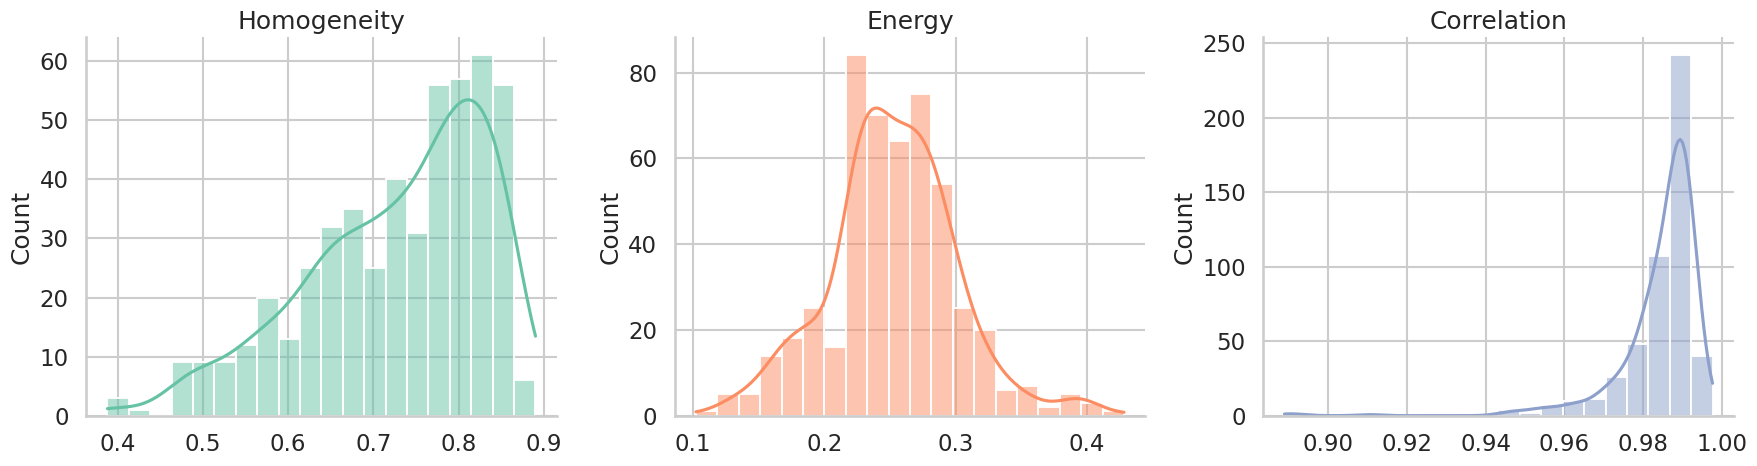

In [9]:
df = stats.get_glcm_metrics(sample=500)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs = axs.ravel()

metric = ["homogeneity", "energy", "correlation"]

for i, col in enumerate(metric):
    sns.histplot(df, x=col, bins=20, kde=True, ax=axs[i], color=sns.color_palette()[i])
    axs[i].set_title(col.title())
    axs[i].set_xlabel("")
    axs[i].set_ylabel("Count")

plt.tight_layout()
sns.despine()
plt.show()